# Lotto Number Predictions

This notebook performs a download of the most recent winning numbers from the Lotto649 (a lottery managed by the **British Columbia Lotto Corporation** in BC, Canada), and performs basic number analysis on them in order to describe the most winningest numbers in history.



## Imports

In [32]:
import sys
import pandas as pd
import urllib.request
import zipfile

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

## Resources

In [33]:
# Main Getter Function

# Download 
def dl_file(url, data_path, file_name):
    print("### Downloading " + url + " and saving as " + data_path + file_name)
    urllib.request.urlretrieve(url, data_path + file_name)
    
    
# Unzip
def unzip(data_path, file_name):
  print("### Unzipping " + file_name + " at " + data_path)
  #extension = ".zip"

  zip_ref = zipfile.ZipFile(data_path + file_name, 'r')
  zip_ref.extractall(data_path)
  zip_ref.close()

# Variables 
# TODO - make abstract to handle other sets
url = "http://www.bclc.com/documents/DownloadableNumbers/CSV/649.zip"
data_path = "data/"
file_name = "649"

# download zip file and save
dl_file(url, data_path, file_name)

# unzip to csv
unzip(data_path, file_name)


### Downloading http://www.bclc.com/documents/DownloadableNumbers/CSV/649.zip and saving as data/649
### Unzipping 649 at data/


## Conversion

In [34]:
base_reader = pd.read_csv(data_path + file_name + ".csv")
base_reader.set_index("DRAW NUMBER", inplace=True)
base_reader.tail()

,PRODUCT,SEQUENCE NUMBER,DRAW DATE,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6,BONUS NUMBER
DRAW NUMBER,,,,,,,,,,
3499,649,0,2017-08-02,13,16,24,25,38,43,48
3500,649,0,2017-08-05,18,21,36,41,45,47,17
3501,649,0,2017-08-09,16,23,28,38,41,43,19
3502,649,0,2017-08-12,5,8,13,25,33,45,38
3503,649,0,2017-08-16,25,29,30,31,33,47,34


In [35]:
columns = list(base_reader.loc[:,'NUMBER DRAWN 1':'NUMBER DRAWN 6'])
draws = base_reader[columns]

draws.tail()

,NUMBER DRAWN 1,NUMBER DRAWN 2,NUMBER DRAWN 3,NUMBER DRAWN 4,NUMBER DRAWN 5,NUMBER DRAWN 6
DRAW NUMBER,,,,,,
3499,13,16,24,25,38,43
3500,18,21,36,41,45,47
3501,16,23,28,38,41,43
3502,5,8,13,25,33,45
3503,25,29,30,31,33,47


## Analysis

### Ball #1

In [88]:
# set
b1 = draws["NUMBER DRAWN 1"]

# describe
b1.describe()

count    3577.000000
mean        7.286273
std         5.798944
min         1.000000
25%         3.000000
50%         6.000000
75%        10.000000
max        38.000000
Name: NUMBER DRAWN 1, dtype: float64

In [89]:
# unique
b1vc = b1.value_counts()
b1vc.columns = ["value"]
b1vc

1     417
2     384
4     341
3     340
5     259
6     228
7     226
9     185
8     183
10    147
11    139
12    121
13    100
14     70
15     66
16     66
17     53
18     46
20     42
19     39
21     26
23     26
22     16
24     12
27     10
26     10
25      6
28      6
30      4
29      4
31      2
33      1
32      1
38      1
Name: NUMBER DRAWN 1, dtype: int64

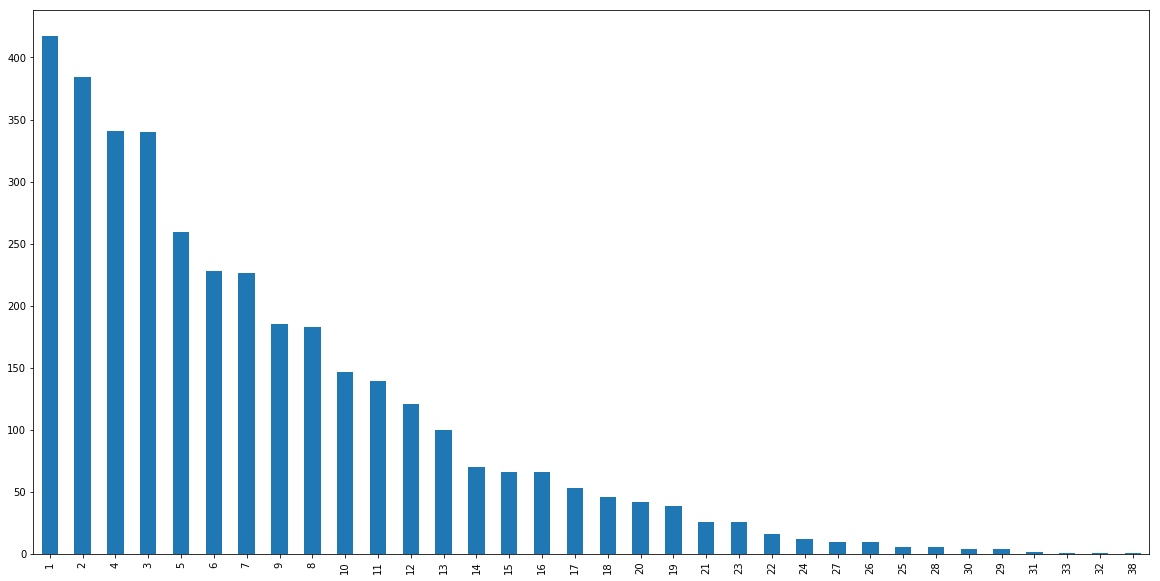

In [69]:
b1vc.plot(kind='bar')

### Ball #2

In [86]:
# set
b2 = draws["NUMBER DRAWN 2"]

# describe
b2.describe()

count    3577.000000
mean       14.525860
std         7.565853
min         2.000000
25%         8.000000
50%        14.000000
75%        20.000000
max        43.000000
Name: NUMBER DRAWN 2, dtype: float64

In [87]:
# unique
b2vc = b2.value_counts()
b2vc.columns = ["value"]
b2vc

12    191
8     186
10    179
7     175
9     174
13    172
15    171
14    169
11    159
16    157
17    154
5     151
6     148
20    131
19    127
18    125
21    123
4      97
3      91
22     91
23     80
24     79
26     65
25     58
27     49
2      47
29     47
28     42
30     39
32     26
31     19
33     13
35     11
34     11
36      4
37      4
38      3
40      3
39      3
43      1
41      1
42      1
Name: NUMBER DRAWN 2, dtype: int64

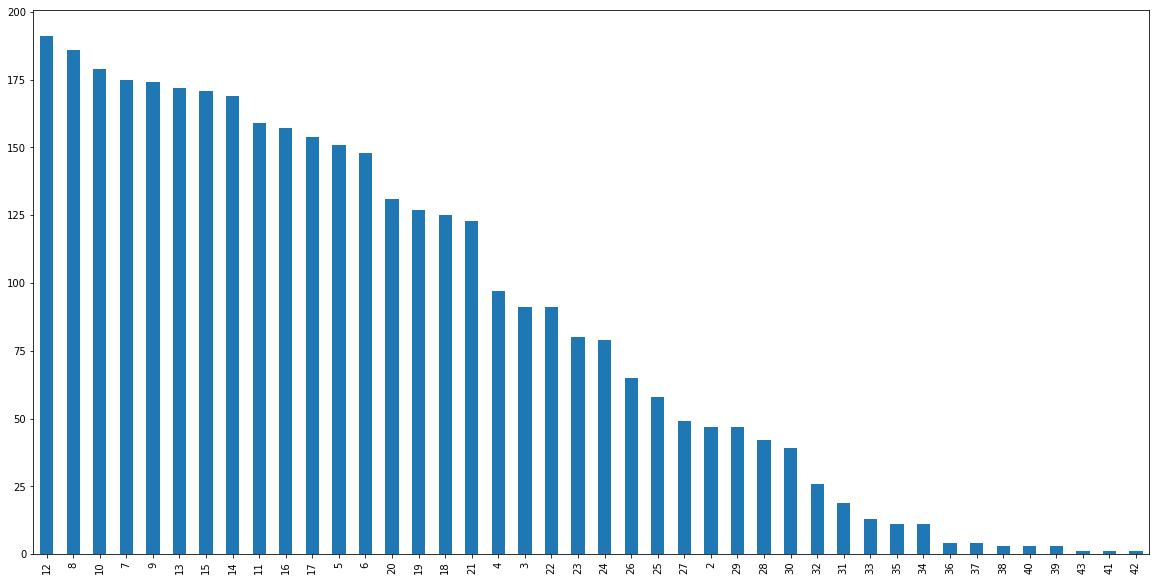

In [66]:
b2vc.plot(kind='bar')

### Ball #3

In [85]:
# set
b3 = draws["NUMBER DRAWN 3"]

# describe
b3.describe()

count    3577.000000
mean       21.854068
std         8.182514
min         3.000000
25%        16.000000
50%        22.000000
75%        28.000000
max        45.000000
Name: NUMBER DRAWN 3, dtype: float64

In [80]:
# unique
b3vc = b3.value_counts()
b3vc.columns = ["value"]
b3vc

22    175
23    166
20    162
21    158
19    156
25    155
24    154
17    152
18    146
16    138
26    132
15    129
27    123
29    123
14    113
13    110
28    107
12    103
30     99
31     94
32     89
11     87
33     80
10     71
34     69
9      66
8      57
36     56
7      50
35     50
6      40
37     36
38     28
40     26
39     21
41     18
5      15
42      6
4       6
43      5
3       3
44      2
45      1
Name: NUMBER DRAWN 3, dtype: int64

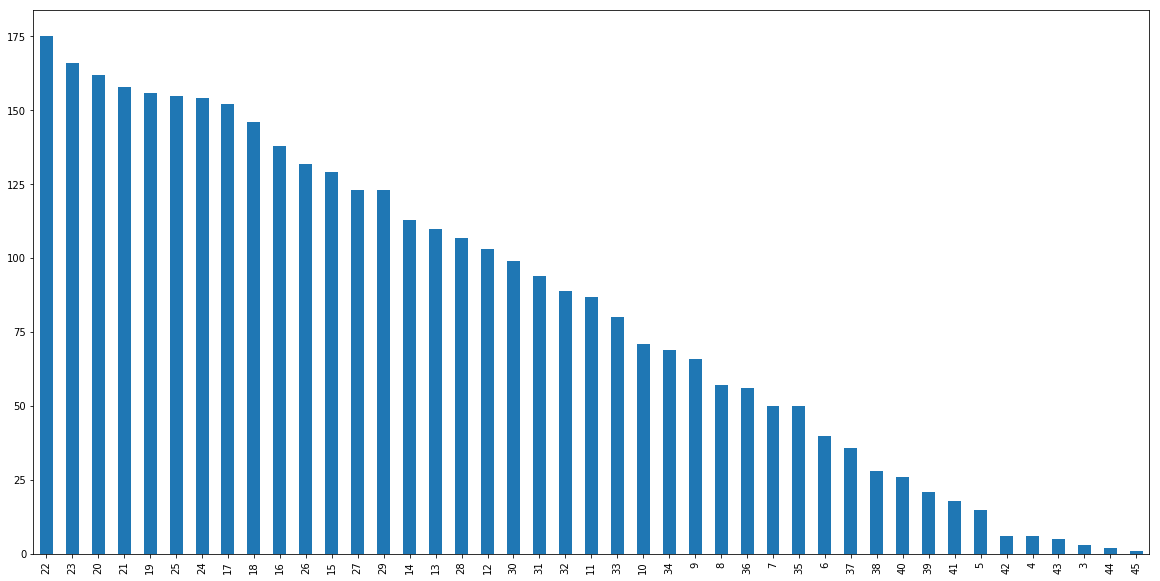

In [73]:
b3vc.plot(kind='bar')

### Ball #4

In [83]:
# set
b4 = draws["NUMBER DRAWN 4"]

# describe
b4.describe()

count    3577.000000
mean       28.968130
std         8.076299
min         4.000000
25%        23.000000
50%        29.000000
75%        35.000000
max        47.000000
Name: NUMBER DRAWN 4, dtype: float64

In [84]:
# unique
b4vc = b4.value_counts()
b4vc.columns = ["value"]
b4vc

31    195
27    171
34    168
32    160
33    160
28    157
26    155
30    152
29    145
36    138
25    133
23    129
35    127
37    121
24    115
38    114
20    105
22    105
39    104
40    100
21     94
19     79
18     78
41     78
16     60
42     59
17     58
15     47
43     46
14     34
44     28
11     25
13     25
12     24
45     20
10     19
9      15
46     13
8      11
47      4
7       3
4       2
6       1
Name: NUMBER DRAWN 4, dtype: int64

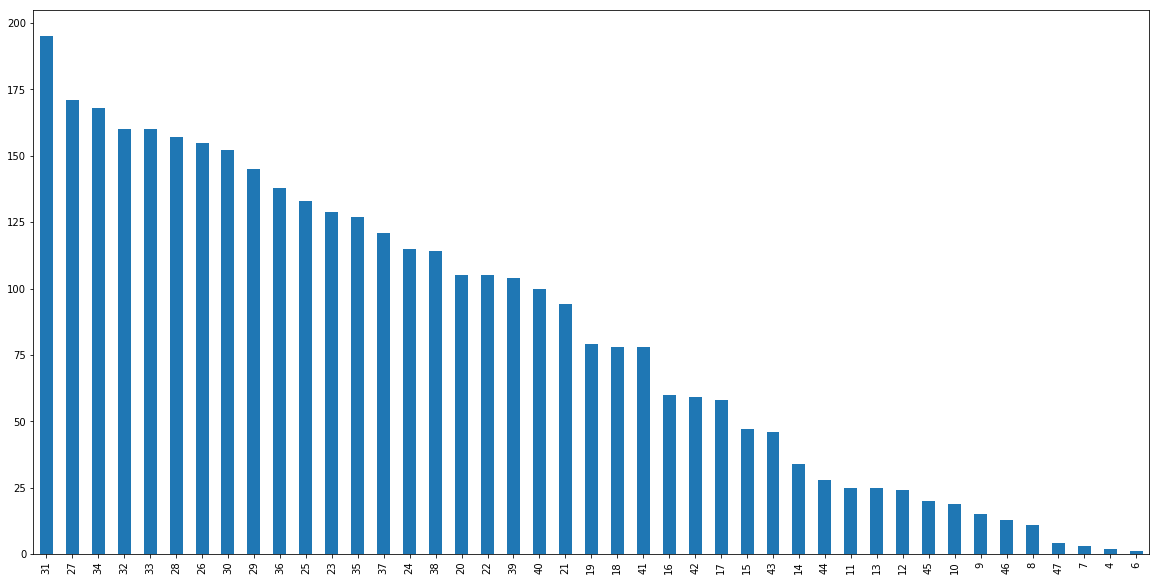

In [82]:
b4vc.plot(kind='bar')

### Ball #5

In [90]:
# set
b5 = draws["NUMBER DRAWN 5"]

# describe
b5.describe()

count    3577.000000
mean       36.150126
std         7.195543
min        11.000000
25%        31.000000
50%        37.000000
75%        42.000000
max        48.000000
Name: NUMBER DRAWN 5, dtype: float64

In [91]:
# unique
b5vc = b5.value_counts()
b5vc.columns = ["value"]
b5vc

38    207
41    203
40    196
43    190
37    182
34    181
42    180
39    178
35    163
36    162
44    161
45    153
33    140
31    138
46    136
32    125
30    111
27     92
29     87
28     82
47     79
26     62
24     62
25     55
48     44
23     38
22     35
21     34
20     27
19     22
17     15
18     11
14      8
13      6
16      5
12      3
11      2
15      2
Name: NUMBER DRAWN 5, dtype: int64

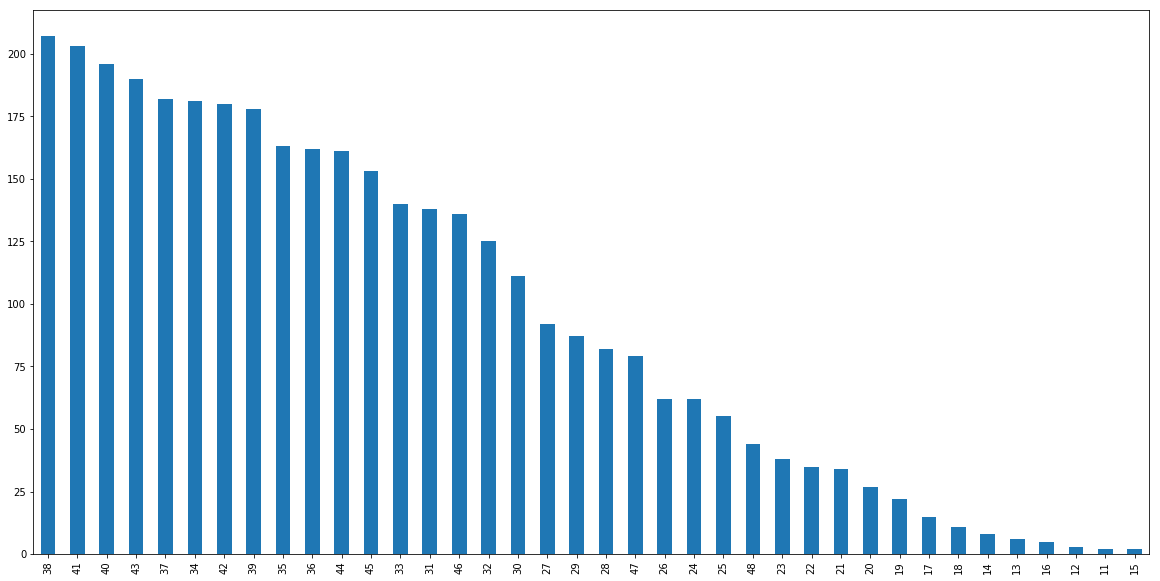

In [92]:
b5vc.plot(kind='bar')


### Ball #6


In [94]:
# set
b6 = draws["NUMBER DRAWN 6"]

# describe
b6.describe()

count    3577.000000
mean       43.101761
std         5.506071
min        13.000000
25%        40.000000
50%        45.000000
75%        47.000000
max        49.000000
Name: NUMBER DRAWN 6, dtype: float64

In [95]:
# unique
b6vc = b6.value_counts()
b6vc.columns = ["value"]
b6vc

49    434
48    387
47    383
46    315
45    304
44    258
43    229
42    195
41    153
40    152
39    120
38    105
37     86
36     85
35     73
33     50
34     43
32     38
31     36
29     28
30     23
28     18
27     18
26     12
23      7
25      6
24      5
20      4
21      4
19      3
13      1
22      1
18      1
Name: NUMBER DRAWN 6, dtype: int64

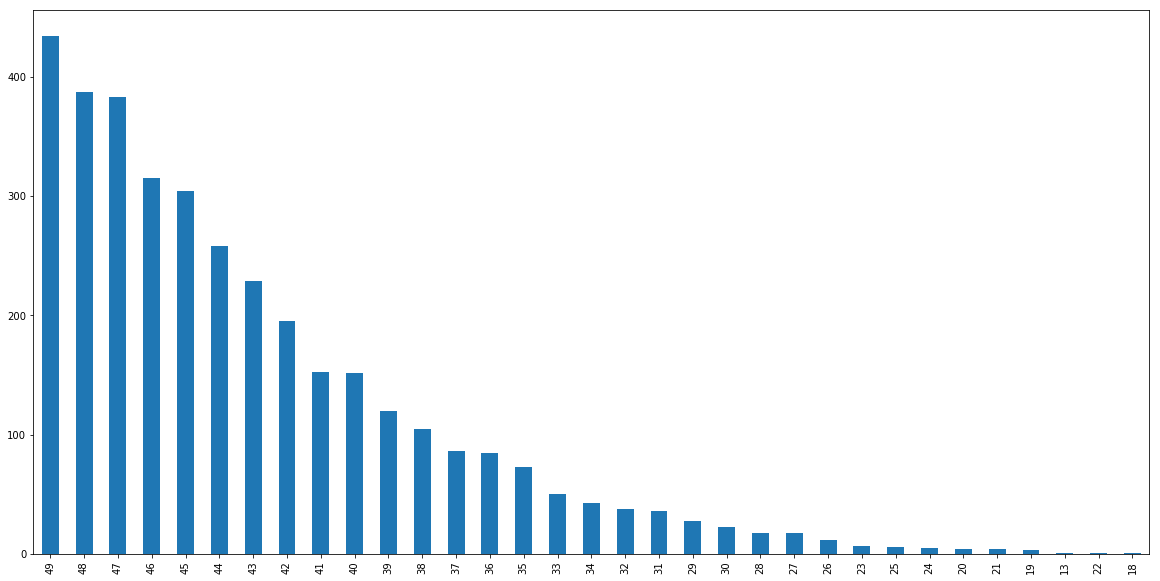

In [96]:
b6vc.plot(kind='bar')

## Max Numbers

In [56]:
total_counts = []
total_values = []
for index, column in enumerate(draws.columns):
    df = draws[column].value_counts().to_frame()
    df.columns = ["value"]
    val = df.iloc[0]
    total_counts.append(val.name)
    total_values.append(val.value)
    print("Most drawn number for %s is the number %s at %s times" % (draws.columns[index], str(val.name), str(val.item())) )

Most drawn number for NUMBER DRAWN 1 is the number 1 at 417 times
Most drawn number for NUMBER DRAWN 2 is the number 12 at 191 times
Most drawn number for NUMBER DRAWN 3 is the number 22 at 175 times
Most drawn number for NUMBER DRAWN 4 is the number 31 at 195 times
Most drawn number for NUMBER DRAWN 5 is the number 38 at 207 times
Most drawn number for NUMBER DRAWN 6 is the number 49 at 434 times


In [13]:
total_counts

[1, 12, 22, 31, 38, 49]

In [14]:
total_values

[417, 191, 175, 195, 207, 434]

In [54]:
index = ['Ball 1','Ball 2','Ball 3','Ball 4','Ball 5','Ball 6']
count = 'number chosen'
value = 'times chosen'
columns = [count,value]
df = pd.DataFrame(index=index, columns=columns)
df[count] = total_counts
df[value] = total_values


In [55]:
df

,number chosen,times chosen
Ball 1,1,417
Ball 2,12,191
Ball 3,22,175
Ball 4,31,195
Ball 5,38,207
Ball 6,49,434
